In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv("BTC-Dataset-USDM-2024-04-01 - 2024-04-17 - 5M.csv")
# Convert date_time column to datetime object and set it as index
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)
data = data[['volume_true']]

# Check if the data is stationary using Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= 0.05:
        print("Reject null hypothesis, data is stationary")
    else:
        print("Fail to reject null hypothesis, data is non-stationary")

adf_test(data['volume_true'])

ADF Statistic: -11.53666598733074
p-value: 3.719053242215623e-21
Critical Values:
	1%: -3.431692652994121
	5%: -2.862133304033542
	10%: -2.567085817041169
Reject null hypothesis, data is stationary


In [ ]:
data

,volume_true
date_time,
2024-04-01 00:00:00,6.949298e+07
2024-04-01 00:05:00,3.051962e+07
2024-04-01 00:10:00,2.019117e+07
2024-04-01 00:15:00,2.084818e+07
2024-04-01 00:20:00,8.683766e+06
...,...
2024-04-17 23:05:00,1.751363e+07
2024-04-17 23:10:00,2.352097e+07
2024-04-17 23:15:00,3.800741e+07


By analyzing both ACF and PACF plots, analysts can identify the appropriate parameters (𝑝, d, q) for an ARIMA model, which can then be used for forecasting future values of the time series.

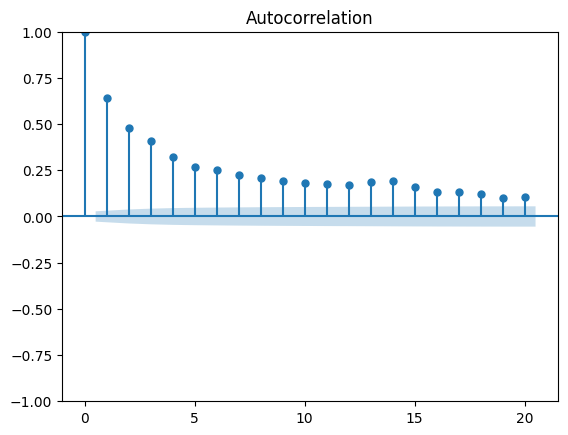

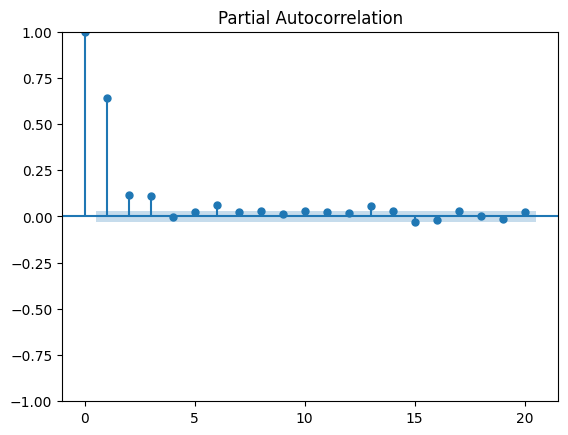

In [ ]:
# Plot ACF and PACF
def plot_acf_pacf(series):
    plot_acf(series, lags=20)
    plot_pacf(series, lags=20)

plot_acf_pacf(data['volume_true'])

Overall, this code segment demonstrates how to fit an ARIMA model to time series data, make predictions, and evaluate the model's performance using MAE, AIC, and BIC metrics.

In [ ]:
data = pd.read_csv("BTC-Dataset-USDM-2024-04-01 - 2024-04-17 - 5M.csv")
# Convert date_time column to datetime object and set it as index
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)
data = data[['volume_true']]
a=4862
data=data.iloc[:a]
# Fit ARIMA model
model = ARIMA(data['volume_true'], order=(1,0,5))
model_fit = model.fit()

# Predict next value
next_value = model_fit.forecast()[0]
print("Predicted next value:", next_value)

# Calculate Mean Absolute Error
forecast_steps = 1  # Adjust the number of steps to forecast as needed
forecast = model_fit.forecast(steps=forecast_steps)

# Get the actual value for the specified timestamp
actual_value = data.iloc[-1]['volume_true']
print("Actual value at timestamp:", actual_value)

# Calculate Mean Absolute Error
actual_values = data['volume_true'][-forecast_steps:]
mae = mean_absolute_error(actual_values, forecast)
print("Mean Absolute Error:", mae)

# Print AIC and BIC
print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


Predicted next value: 25099581.79678853
Actual value at timestamp: 21122710.039
Mean Absolute Error: 3976871.7577885278
AIC: 185592.93005948619
BIC: 185644.8437007252


In [ ]:
data

,volume_true
date_time,
2024-04-01 00:00:00,6.949298e+07
2024-04-01 00:05:00,3.051962e+07
2024-04-01 00:10:00,2.019117e+07
2024-04-01 00:15:00,2.084818e+07
2024-04-01 00:20:00,8.683766e+06
...,...
2024-04-17 20:25:00,2.395014e+07
2024-04-17 20:30:00,1.475944e+07
2024-04-17 20:35:00,2.126631e+07


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv("your_dataset.csv")

# Select only the 'volume_true' column
data = data[['date_time', 'volume_true']]

# Convert date_time column to datetime object and set it as index
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)


In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(data.volume_true, test='adf')

0

In [ ]:
# Fit ARIMA model
model = ARIMA(data['volume_true'], order=(1,0,5))
model_fit = model.fit()

# Specify the timestamp for prediction
timestamp_to_predict = "2024-04-17 23:00:00"
timestamp_to_predict = pd.to_datetime(timestamp_to_predict)

# Forecast the next value
forecast_value = model_fit.forecast(steps=1)
print("Forecasted next value:", forecast_value[0])

# Get the actual value for the specified timestamp
actual_value = data.loc[timestamp_to_predict, 'volume_true']
print("Actual value at timestamp:", actual_value)

# Calculate Mean Absolute Error for the specified timestamp
mae = mean_absolute_error([actual_value], forecast_value)
print("Mean Absolute Error:", mae)

# Print AIC and BIC
print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


Forecasted value at timestamp: 22868244.36034406
Actual value at timestamp: 43315890.3509
Mean Absolute Error: 20447645.990555942
AIC: 186635.62481405627
BIC: 186687.58439471602
